In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pprint import pprint

In [2]:
df1 = pd.read_excel('C:/2022-2/New_Decoy/BEST/result/HEK(precursor_swap)/TPRP_EXPAND.xlsx')
df1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,QGDSEQLDPAR/3,0.415,0.103,[2],0,-0.00666,237,0.074,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,3.009777e+09
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,IMSETSMR/3,0.238,0.006,[2],0,0.33400,356,0.068,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,2.762163e+09
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,ILPLFSR/2,0.239,0.033,[2],0,-0.00300,251,0.063,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,2.581207e+09
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,SAEDVSTVPTQPDNPFSHPDK/2,0.165,0.018,[2],0,0.00500,41,0.052,...,-1,0,0,(),Normal,Unk,Unk,0,360199789,NaN
4,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,GSNSHDEFNVAHELIC[160]K/2,0.214,0.028,[2],0,0.49800,53,0.060,...,-1,0,0,(),Normal,Unk,Unk,1,XXX_,2.395937e+09


In [3]:
ID = df1['ID'].values.tolist()
ID

['QGDSEQLDPAR/3',
 'IMSETSMR/3',
 'ILPLFSR/2',
 'SAEDVSTVPTQPDNPFSHPDK/2',
 'GSNSHDEFNVAHELIC[160]K/2',
 'LLNVIQPHLDGIK/4',
 'IPMGTC[160]HLGFPFLC[160]C[160]K/2',
 'HVEEGSWYIQSLC[160]NHLK/2',
 'TQLDWYEPGEQEIWPAR/2',
 'DTQEPNLSETFNNNEIEK/2',
 'HWDEVLAVAEEGSEPHR/2',
 'DLEDGEVPQHAGK/3',
 'GGFAISQVIHAK/3',
 'DTIGGGPMVVIR/4',
 'NFC[160]SAVQYGNAQIIEC[160]LKENK/3',
 'TDSDMFINVDYLTELLLK/3',
 'VLNSPGVWHK/2',
 'LGLQYMELIPK/3',
 'GQLLNQFSFSQVLPDVQAR/3',
 'LEYHGEIFVK/2',
 'EQQQQQMWNSAR/4',
 'VGDTVVGTRDPKVK/3',
 'WDAYQLLSPEVR/2',
 'ELHSWEPEPDVR/2',
 'IEQPVELK/3',
 'EAGKEPAEGGGGDGSHR/3',
 'HAVTLSPGQVLFVPR/4',
 'DM[147]LESPDFSTVLNTC[160]LNR/2',
 'AGVALAPGPSGR/2',
 'AGYSIIIPFK/2',
 'DQQFQSLYPSVK/3',
 'TDLPPPSSESEQIDLTEEQK/4',
 'VGSVIAR/2',
 'EEMTQLQQQINEHK/4',
 'DDDMWGEDLQLEPR/4',
 'DAGLHC[160]LELGHTGEAGPHAMVR/5',
 'MLVDLLLPR/2',
 'MLSLLVVDVGNPEEVR/3',
 'APLMWELIHK/2',
 'DNNLEVVC[160]FPDSR/3',
 'SILFQVTC[160]VHGAK/4',
 'EMMEQNC[160]AHSK/4',
 'ADAQGEK/2',
 'EETVSPK/2',
 'ILALEATYLLPLR/3',
 'KAAVGVK/2',


In [4]:
f = open("Target_predicted_10__revDecoy_predicted_10_EXPAND.msp")
total = 0
lib = {}
sequence = []

while True:
    if not total:
        line = f.readline()
    
    if not line: break
    
    if line.startswith('Name'):
        total += 1
        if not total % 50000:
            print(total)
        
        seq = line[6:-1]
        s = seq.split('/') # 'CIMDGDYYYK', '2_2(0,C,CAM)(2,M,Oxidation)' 
        cs = s[1][0]
        
        # modification이 있으면
        if len(s[1]) > 1:
            
            nummod = int(s[1][2]) # modification 개수
            
            # modification이 0으로 있을 때
            if not nummod:
                seq = seq[:-2]
            
            # modification이 1개 이상 있을 때
            else:
                modinfo = s[1][3:]     # (0,C,CAM)(2,M,Oxidation)        
                m = modinfo.split('(') # '', '0,C,CAM)', '2,M,Oxidation)'
                
                where = []
                what = []
                for i in range(0, nummod):
                    w = m[i+1].split(',')
                    where_ = int(w[0])
                    what_ = w[1]
                    where.append(where_) # [0, 2]
                    what.append(what_)   # ['C', 'M'] 
                
                newseq = ''
                amino = s[0] # CIMDGDYYYK'
                index = 0
                for i in range(len(amino)):
                    newseq += amino[i]
                    
                    if index < nummod:
                        if where[index] == i:
                            if what[index] == 'C':
                                newseq += '[160]'
                            elif what[index] == 'M':
                                newseq += '[147]'
                            index += 1
                seq = newseq + '/' + cs

        #print(seq)
        sequence.append(seq)
        
        line = f.readline()
        line = f.readline()
        line = f.readline()
        line = f.readline()
        
        peaks = []
        while True:
            if line.startswith('Name:'):
                break
            if line.startswith('\n'):
                break
            if not line: break
            
            data = line.split('\t')
            mz = float(data[0])
            inten = float(data[1])
            peak = [mz, math.sqrt(inten)]
            peaks.append(peak)
            
            line = f.readline()
        
        #pprint(peaks)
        lib[seq] = peaks

f.close()
print(total)

50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000
1450000
1500000
1550000
1600000
1650000
1700000
1750000
1800000
1850000
1900000
1950000
2000000
2050000
2100000
2150000
2200000
2250000
2300000
2350000
2400000
2450000
2500000
2550000
2600000
2650000
2700000
2750000
2800000
2850000
2900000
2950000
3000000
3050000
3100000
3150000
3200000
3250000
3300000
3350000
3400000
3450000
3500000
3550000
3600000
3650000
3700000
3750000
3800000
3850000
3884901


In [5]:
cnt = 0
LIB_SPEC = []

for i in ID:
    if lib.get(i) is None:
        cnt += 1
        #print(i)
        
        s1 = i.split('[')
        #print(s1)
        key = s1[0]
        
        for j in range(1, len(s1)):
            s2 = s1[j].split(']')
            #print(s2)
            key += s2[1]
            
        #print(key)
        LIB_SPEC.append(lib[key])
        
    else:
        LIB_SPEC.append(lib[i])
        
print(cnt)
print(len(ID))

183979
852889


In [6]:
seq_df = pd.DataFrame(sequence, columns = ['seq'])
seq_df

,seq
0,MGLEALVPLAMIVAIFLLLVDLMHR/2
1,YPPGPLPLPGLGNLLHVDFQNTPYCFDQLR/2
2,FGDVFSLQLAWTPVVVLNGLAAVR/2
3,GEDTADR/2
4,PPAPIYQVLGFGPR/2
...,...
3884896,DQPNVAWYYYR/2
3884897,PTIGSSDAPNIVWYYYK/2
3884898,WMYYYYK/2
3884899,WM[147]YYYYK/2


In [8]:
#seq_df.to_excel('C:/2022-2/seq_expand.xlsx', header = True, index = False)

In [9]:
print(len(LIB_SPEC))
print(len(ID))
LIB_SPEC

852889
852889


[[[129.065857, 20.582000194344573],
  [172.108047, 89.45472083126748],
  [175.118958, 137.9284663584715],
  [186.087326, 49.27139683426886],
  [229.621521, 33.8082898266091],
  [246.156067, 89.4357414516143],
  [259.098083, 8.040105596321482],
  [286.163544, 32.07276665646417],
  [301.114258, 43.22633264573806],
  [323.12738, 11.143339669955322],
  [343.208832, 316.22776601683796],
  [350.192841, 18.0180631034526],
  [388.146301, 52.38658163117727],
  [458.235779, 180.12065095651857],
  [517.188904, 68.88543843948443],
  [571.319824, 112.43879852168467],
  [645.247437, 63.30908174977742],
  [699.378418, 44.083382617489775],
  [758.331543, 12.724903339515]],
 [[153.583359, 25.70754120875818],
  [175.118958, 316.22776601683796],
  [197.099365, 28.29435572689366],
  [245.131821, 148.6836550734478],
  [306.159424, 202.037969065223],
  [332.163849, 77.48368493431376],
  [393.191467, 211.6369377944219],
  [494.239136, 207.15883750156544],
  [623.281738, 112.86304493500076],
  [710.313782, 17

In [10]:
list1 = df1['### Query'].values.tolist()
list1 ########################################################################

['b1906_293T_proteinID_01A_QE3_122212.00001.00001.3',
 'b1906_293T_proteinID_01A_QE3_122212.00002.00002.3',
 'b1906_293T_proteinID_01A_QE3_122212.00003.00003.2',
 'b1906_293T_proteinID_01A_QE3_122212.00004.00004.2',
 'b1906_293T_proteinID_01A_QE3_122212.00006.00006.2',
 'b1906_293T_proteinID_01A_QE3_122212.00007.00007.4',
 'b1906_293T_proteinID_01A_QE3_122212.00008.00008.2',
 'b1906_293T_proteinID_01A_QE3_122212.00009.00009.2',
 'b1906_293T_proteinID_01A_QE3_122212.00010.00010.2',
 'b1906_293T_proteinID_01A_QE3_122212.00011.00011.2',
 'b1906_293T_proteinID_01A_QE3_122212.00012.00012.2',
 'b1906_293T_proteinID_01A_QE3_122212.00013.00013.3',
 'b1906_293T_proteinID_01A_QE3_122212.00014.00014.3',
 'b1906_293T_proteinID_01A_QE3_122212.00015.00015.4',
 'b1906_293T_proteinID_01A_QE3_122212.00016.00016.3',
 'b1906_293T_proteinID_01A_QE3_122212.00017.00017.3',
 'b1906_293T_proteinID_01A_QE3_122212.00018.00018.2',
 'b1906_293T_proteinID_01A_QE3_122212.00019.00019.3',
 'b1906_293T_proteinID_01A_Q

In [11]:
file_name = ['b1906_293T_proteinID_01A_QE3_122212',
            'b1922_293T_proteinID_02A_QE3_122212',
            'b1923_293T_proteinID_03A_QE3_122212',
            'b1924_293T_proteinID_04A_QE3_122212',
            'b1925_293T_proteinID_05A_QE3_122212',
            'b1926_293T_proteinID_06A_QE3_122212',
            'b1927_293T_proteinID_07A_QE3_122212',
            'b1928_293T_proteinID_08A_QE3_122212',
            'b1929_293T_proteinID_09A_QE3_122212',
            'b1930_293T_proteinID_10A_QE3_122212',
            'b1931_293T_proteinID_11A_QE3_122212',
            'b1932_293T_proteinID_12A_QE3_122212',
            'b1937_293T_proteinID_01B_QE3_122212',
            'b1938_293T_proteinID_02B_QE3_122212',
            'b1939_293T_proteinID_03B_QE3_122212',
            'b1940_293T_proteinID_04B_QE3_122212',
            'b1941_293T_proteinID_05B_QE3_122212',
            'b1942_293T_proteinID_06B_QE3_122212',
            'b1943_293T_proteinID_07B_QE3_122212',
            'b1944_293T_proteinID_08B_QE3_122212',
            'b1945_293T_proteinID_09B_QE3_122212',
            'b1946_293T_proteinID_10B_QE3_122212',
            'b1947_293T_proteinID_11B_QE3_122212',
            'b1948_293T_proteinID_12B_QE3_122212']
len(file_name)

24

In [12]:
search = []
idx = 0 # 0~23

s = []
for i in list1:
    q = i.split('.')
    
    if q[0] != file_name[idx]:
        idx += 1
        search.append(s)
        s = []
        
    if q[0] == file_name[idx]:
        #print(q[0])
        scan = int(q[1])
        cs = int(q[3])
        s.append([scan, cs])
        
search.append(s)

In [13]:
print(len(search))
search

24


[[[1, 3],
  [2, 3],
  [3, 2],
  [4, 2],
  [6, 2],
  [7, 4],
  [8, 2],
  [9, 2],
  [10, 2],
  [11, 2],
  [12, 2],
  [13, 3],
  [14, 3],
  [15, 4],
  [16, 3],
  [17, 3],
  [18, 2],
  [19, 3],
  [21, 3],
  [22, 2],
  [23, 4],
  [24, 3],
  [25, 2],
  [26, 2],
  [27, 3],
  [28, 3],
  [29, 4],
  [30, 2],
  [31, 2],
  [32, 2],
  [33, 3],
  [35, 4],
  [36, 2],
  [37, 4],
  [38, 4],
  [39, 5],
  [40, 2],
  [41, 3],
  [42, 2],
  [43, 3],
  [45, 4],
  [46, 4],
  [47, 2],
  [48, 2],
  [49, 3],
  [50, 2],
  [51, 4],
  [52, 2],
  [53, 4],
  [54, 4],
  [55, 3],
  [56, 2],
  [58, 2],
  [60, 3],
  [61, 3],
  [62, 4],
  [63, 3],
  [64, 2],
  [65, 4],
  [66, 2],
  [67, 2],
  [68, 4],
  [69, 2],
  [70, 2],
  [71, 3],
  [72, 2],
  [73, 2],
  [74, 5],
  [75, 4],
  [76, 4],
  [77, 4],
  [78, 4],
  [79, 5],
  [80, 3],
  [81, 2],
  [82, 4],
  [83, 2],
  [84, 2],
  [86, 4],
  [87, 2],
  [88, 3],
  [89, 2],
  [90, 2],
  [91, 4],
  [92, 3],
  [93, 3],
  [94, 3],
  [95, 4],
  [96, 3],
  [97, 2],
  [98, 3],
  [99, 

In [14]:
import math
import numpy as np
from pprint import pprint

def DotProduct(MS2, LIB):
    mz = [0]
    lib = [0]
    ms2 = [0]
    
    libidx = 0
    ms2idx = 0
    
    while True:
        if libidx == len(LIB):
            while True:
                if ms2idx == len(MS2): break
                mz += [MS2[ms2idx][0]]
                lib += [0]
                ms2 += [MS2[ms2idx][1]]
                ms2idx += 1
            break
        if ms2idx == len(MS2):
            while True:
                if libidx == len(LIB): break
                mz += [LIB[libidx][0]]
                lib += [LIB[libidx][1]]
                ms2 += [0]
                libidx += 1
            break
    
        if abs(LIB[libidx][0] - MS2[ms2idx][0]) <= 0.05:
            mz += [(LIB[libidx][0] + MS2[ms2idx][0]) / 2]
            lib += [LIB[libidx][1]]
            ms2 += [MS2[ms2idx][1]]
            libidx += 1
            ms2idx += 1
        elif LIB[libidx][0] < MS2[ms2idx][0]:
            mz += [LIB[libidx][0]]
            lib += [LIB[libidx][1]]
            ms2 += [0]
            libidx += 1
        else:
            mz += [MS2[ms2idx][0]]
            lib += [0]
            ms2 += [MS2[ms2idx][1]]
            ms2idx += 1

    del mz[0]
    del lib[0]
    del ms2[0]
    
    peak_match = 0
    
    for k in range(len(lib)):
        if lib[k] != 0 and ms2[k] != 0:
            peak_match += 1
    
    #similarity = np.dot(lib, ms2) / math.sqrt(np.dot(lib, lib) * np.dot(ms2, ms2))
    
    #return similarity
    return peak_match

In [15]:
# i -> 0~23 : search를 돌면서 해당하면 호출
cnt = 0
lib_idx = 0
PEAK_MATCH = []

for i in range(0, 24):
    print(i)
    idx = 0 # 한 파일 내의 서치 결과를 돌면서 해당하면 호출
    print(idx)
    file = 'C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/' + file_name[i] + '.mgf'
    print(file)
    
    f = open(file)
    name = file.split('/')[7][:-4] # b1906_293T_proteinID_01A_QE3_122212
    total = 0
    
    while True:
        line = f.readline()
    
        if not line: break
    
        if line.startswith('BEGIN'):
            total += 1
            if not total % 10000:
                print(total)
        
            line = f.readline()
            line = f.readline()
        
            query = line.split(' ')[0][6:]
            #print(query)
            cs = int(query[-1])
        
            check = [total, cs]
            #print(check)
        
            line = f.readline()
            line = f.readline()
            line = f.readline()
            line = f.readline()
        
            peaks = []
            while True:
                if line.startswith('END'):
                    break
                if not line: break
            
                data = line.split(' ')
                mz = float(data[0])
                inten = float(data[1])
                peak = [mz, math.sqrt(inten)]
                peaks.append(peak)
            
                line = f.readline()
            
            #pprint(peaks)
            if check == search[i][idx]:
                cnt += 1
                PEAK_MATCH.append(DotProduct(peaks, LIB_SPEC[lib_idx]))
                lib_idx += 1
                if len(search[i]) - 1 > idx:
                    idx += 1

    f.close()
print(total)
print(cnt)

0
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1906_293T_proteinID_01A_QE3_122212.mgf
10000
20000
30000
1
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1922_293T_proteinID_02A_QE3_122212.mgf
10000
20000
30000
2
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1923_293T_proteinID_03A_QE3_122212.mgf
10000
20000
30000
3
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1924_293T_proteinID_04A_QE3_122212.mgf
10000
20000
30000
4
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1925_293T_proteinID_05A_QE3_122212.mgf
10000
20000
30000
5
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1926_293T_proteinID_06A_QE3_122212.mgf
10000
20000
30000
6
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1927_293T_proteinID_07A_QE3_122212.mgf
10000
20000
30000
40000
7
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1928_293T_proteinID_08A_QE3_122212.mgf
10000
20000
30000
8
0
C:/2022-2/New_Decoy/BEST/PEAK/HEK_data/precursor_swap/b1929_29

In [16]:
len(PEAK_MATCH)

852889

In [17]:
len(df1)

852889

(0.0, 15.0)

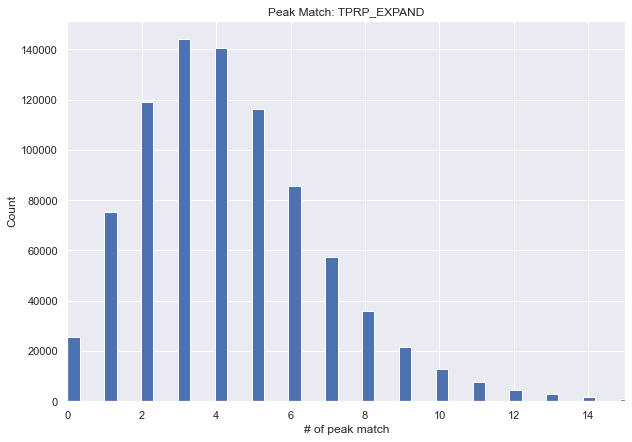

In [18]:
plt.figure(figsize = (10, 7))
plt.xlabel('# of peak match')
plt.ylabel('Count')
plt.title('Peak Match: TPRP_EXPAND')
PM_hist = plt.hist(PEAK_MATCH, bins = 100)
plt.xlim([0, 15])

In [19]:
pm = pd.DataFrame(PEAK_MATCH, columns = ['peak match'])
pm

,peak match
0,4
1,4
2,2
3,0
4,1
...,...
852884,1
852885,2
852886,0
852887,0


In [20]:
result = pd.concat([df1, pm], axis = 1)
result

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset,peak match
0,b1906_293T_proteinID_01A_QE3_122212.00001.00001.3,1,QGDSEQLDPAR/3,0.415,0.103,[2],0,-0.00666,237,0.074,...,0,0,(),Normal,Unk,Unk,1,XXX_,3.009777e+09,4
1,b1906_293T_proteinID_01A_QE3_122212.00002.00002.3,1,IMSETSMR/3,0.238,0.006,[2],0,0.33400,356,0.068,...,0,0,(),Normal,Unk,Unk,1,XXX_,2.762163e+09,4
2,b1906_293T_proteinID_01A_QE3_122212.00003.00003.2,1,ILPLFSR/2,0.239,0.033,[2],0,-0.00300,251,0.063,...,0,0,(),Normal,Unk,Unk,1,XXX_,2.581207e+09,2
3,b1906_293T_proteinID_01A_QE3_122212.00004.00004.2,1,SAEDVSTVPTQPDNPFSHPDK/2,0.165,0.018,[2],0,0.00500,41,0.052,...,0,0,(),Normal,Unk,Unk,0,360199789,NaN,0
4,b1906_293T_proteinID_01A_QE3_122212.00006.00006.2,1,GSNSHDEFNVAHELIC[160]K/2,0.214,0.028,[2],0,0.49800,53,0.060,...,0,0,(),Normal,Unk,Unk,1,XXX_,2.395937e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852884,b1948_293T_proteinID_12B_QE3_122212.43622.43622.2,1,FVPLPKSADLAR/2,0.255,0.043,[2],0,0.49100,286,0.070,...,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9H2F5|EPC1_HUMAN(pre=R,post=C)",4.893932e+09,1
852885,b1948_293T_proteinID_12B_QE3_122212.43624.43624.2,1,PWFLLGGDER/2,0.223,0.002,[3],0,0.00100,644,0.072,...,0,0,(),Normal,Unk,Unk,0,4693688180,NaN,2
852886,b1948_293T_proteinID_12B_QE3_122212.43625.43625.2,1,LIFNENDFVEGYYR/2,0.223,0.064,[3],0,0.00400,101,0.045,...,0,0,(),Normal,Unk,Unk,0,263165363,NaN,0
852887,b1948_293T_proteinID_12B_QE3_122212.43628.43628.2,1,VTNQIISAC[160]K/2,0.318,0.016,[2],0,0.49500,596,0.059,...,0,0,(),Normal,Unk,Unk,0,280104186,NaN,0


In [21]:
result.to_excel('C:/2022-2/New_Decoy/BEST/result/HEK(precursor_swap)/TPRP_EXPAND_peak_match.xlsx', header=True, index=False)